In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('./housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This function help visualize general idea about the statistical distribution in this dataset. 
Overall, there are multiple outliers in this dataset that need to be remove.

In [4]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


This function finds the null value in the dataset. In this case, total_bedrooms has 207 null value. It makes sense to drop these null in order to visualize and train the data

In [5]:
print(df.shape[0]) # number of row before drop NA value
df = df.dropna()
print(df.shape[0]) # number of row after drop NA value

20640
20433


In [6]:
print(df.duplicated().sum())

0


This dataset does not have any duplicated row. Therefore, we do not need to remove anything

In [7]:
df = df.astype({'total_rooms':'float64', 'housing_median_age':'int64'})

In [8]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [9]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_household"] = df["total_bedrooms"]/df["households"]
df["population_per_household"]=df["population"]/df["households"]
df = df[~(df["population_per_household"] > 50)]

Find out how many people living in one bedrooms in each block. 

<AxesSubplot:>

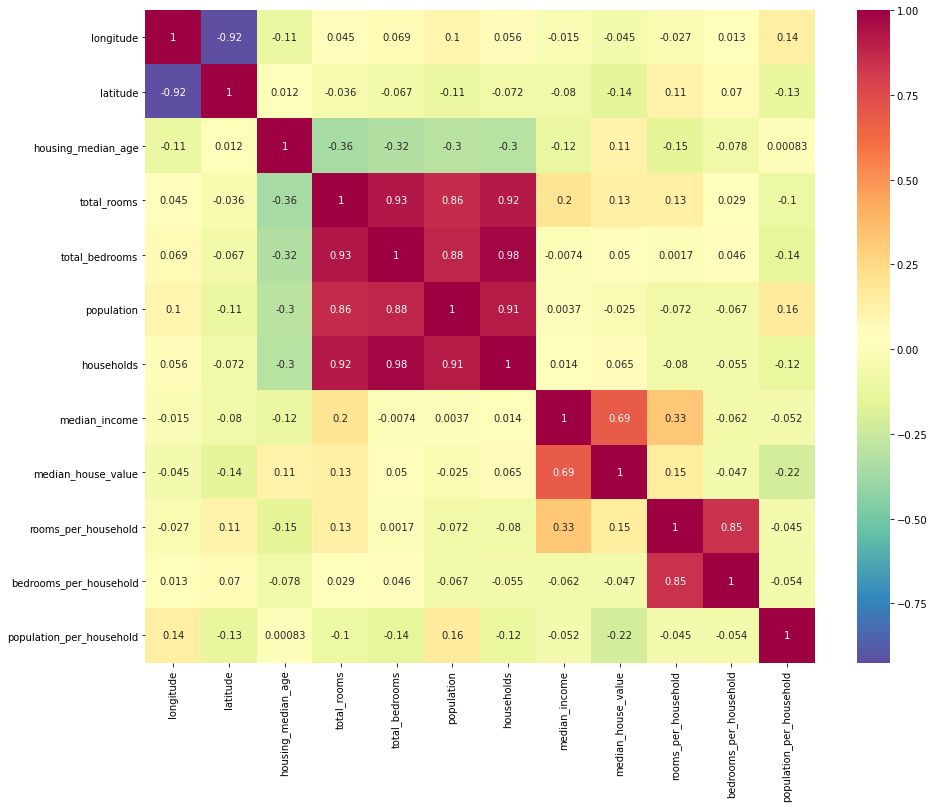

In [10]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap="Spectral_r")

This graph shows the correlation between each variable in the dataset. We can see how these variables affect other variables by looking at the graph.

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

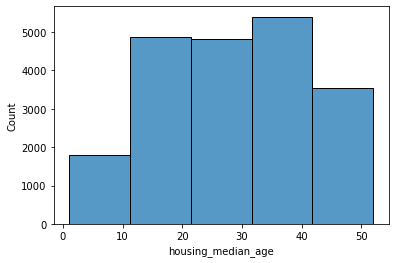

In [11]:
sns.histplot(df, x="housing_median_age", bins=5)

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

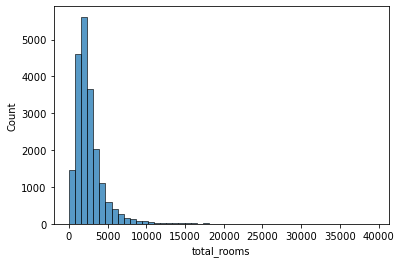

In [12]:
sns.histplot(df, x="total_rooms", bins=50)

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

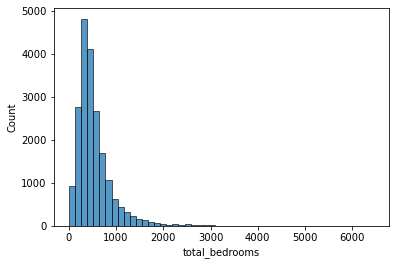

In [13]:
sns.histplot(df, x="total_bedrooms", bins=50)

<AxesSubplot:xlabel='population', ylabel='Count'>

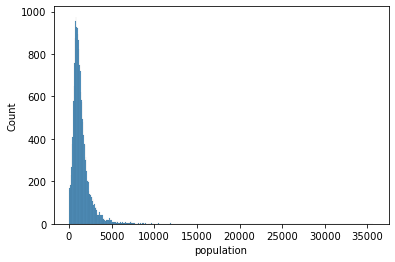

In [14]:
sns.histplot(df, x="population")

<AxesSubplot:xlabel='households', ylabel='Count'>

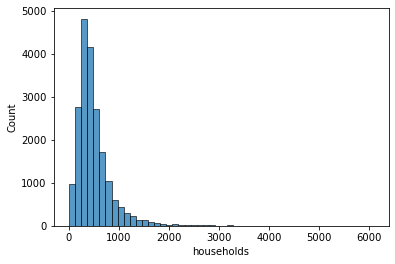

In [15]:
sns.histplot(df, x="households", bins=50)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

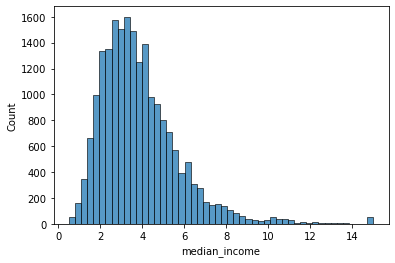

In [16]:
sns.histplot(df, x="median_income", bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

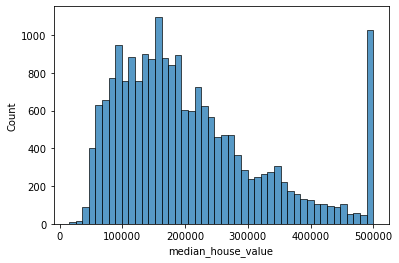

In [17]:
sns.histplot(df, x="median_house_value")

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

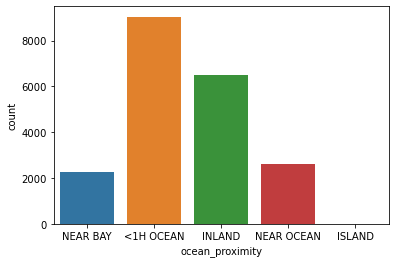

In [18]:
sns.countplot(data=df, x="ocean_proximity")

In [19]:
df = df.drop(columns=['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'])

In this dataset, longitude, latitude, total_rooms, total_bedrooms, population, and households are either not necessary for visualize and, training the model or it is representing by other columns in the dataset. As a result, I choose to drop these 6 columns.

In [20]:
df['median_income'] = df['median_income'] * 10000
df.describe()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20426.000000,20426.000000,20426.000000,20426.000000,20426.000000,20426.000000
mean,28.632233,38706.397875,206873.639185,5.431063,1.097067,2.936778
std,12.589762,18988.807766,115444.479629,2.483062,0.476166,0.944413
min,1.000000,4999.000000,14999.000000,0.846154,0.333333,0.692308
25%,18.000000,25628.000000,119500.000000,4.441299,1.006067,2.428925
50%,29.000000,35360.000000,179800.000000,5.230769,1.048892,2.817415
75%,37.000000,47435.500000,264700.000000,6.052319,1.099609,3.280752
max,52.000000,150001.000000,500001.000000,141.909091,34.066667,41.214286


# Preprocessing Data

In [21]:
X = df.drop(['median_house_value'], axis=1)
y = np.log(df['median_house_value'])

In [22]:
X.head()

,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,41,83252.0,NEAR BAY,6.984127,1.023810,2.555556
1,21,83014.0,NEAR BAY,6.238137,0.971880,2.109842
2,52,72574.0,NEAR BAY,8.288136,1.073446,2.802260
3,52,56431.0,NEAR BAY,5.817352,1.073059,2.547945
4,52,38462.0,NEAR BAY,6.281853,1.081081,2.181467


In [23]:
X['median_income'] = np.log(X['median_income'])

In [24]:
encoder=LabelEncoder()
X['ocean_proximity'] = encoder.fit_transform(X['ocean_proximity'])

In [25]:
# <1H OCEAN     9034 0
# INLAND        6490 1
# NEAR OCEAN    2627 4
# NEAR BAY      2270 3
# ISLAND           5 2

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.5563341626239009

In [28]:
y_pred = lr.predict(X_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred1" : y_pred})
df1.reset_index(inplace=True)
df1 = df1.drop('index', axis=1)
df1

,Y_test,Y_pred1
0,12.457998,12.096540
1,11.897507,12.261692
2,12.838939,12.593655
3,11.282254,11.434722
4,12.341914,12.461704
...,...,...
6123,12.123234,11.978455
6124,11.766016,12.304473
6125,11.525842,11.565262
6126,11.470018,12.139005


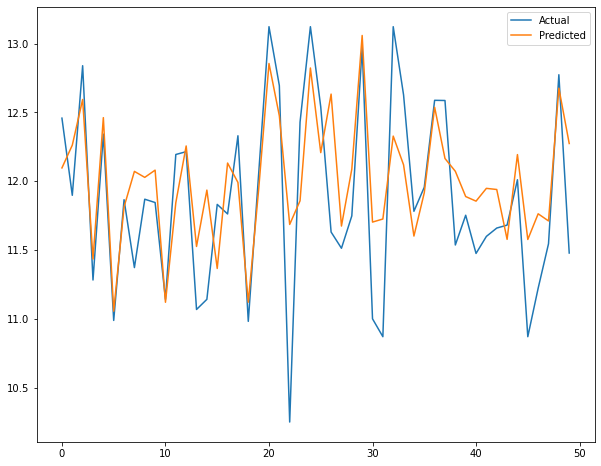

In [29]:
plt.figure(figsize=(10,8))
plt.plot(df1[:50])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.3819588450330344
R-square: 0.5563341626239009


## Ridge Regression

In [31]:
rid = Ridge(alpha=0.6)
rid.fit(X_train , y_train)

Ridge(alpha=0.6)

In [32]:
rid.score(X_test , y_test)

0.556337800557697

In [33]:
y_pred2 =rid.predict(X_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred2})
df2.reset_index(inplace= True)
df2 = df2.drop('index', axis=1)
df2

,Y_test,Y_pred2
0,12.457998,12.096712
1,11.897507,12.261705
2,12.838939,12.593524
3,11.282254,11.435090
4,12.341914,12.461645
...,...,...
6123,12.123234,11.978529
6124,11.766016,12.304527
6125,11.525842,11.565481
6126,11.470018,12.139105


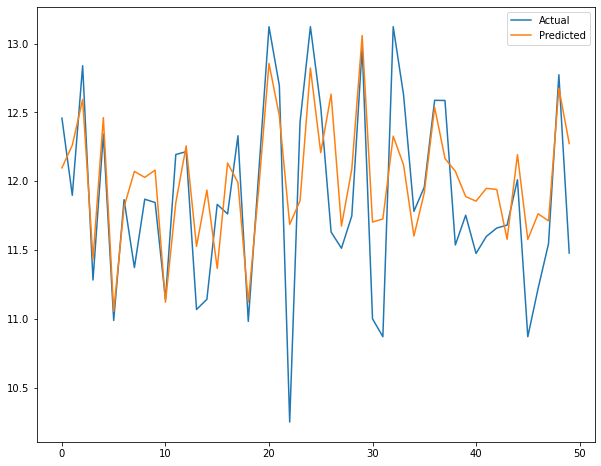

In [34]:
plt.figure(figsize=(10,8))
plt.plot(df2[:50])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
r2 = r2_score(y_test, y_pred2)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.38195727905282767
R-square: 0.556337800557697


## Lasso Regression

In [36]:
las = Lasso(alpha=0.5)
las.fit(X_train , y_train)

Lasso(alpha=0.5)

In [37]:
las.score(X_test , y_test)

0.0010842324061015596

In [38]:
y_pred3 =rid.predict(X_test)
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred3})
df3.reset_index(inplace= True)
df3 = df3.drop('index', axis=1)
df3

,Y_test,Y_pred2
0,12.457998,12.096712
1,11.897507,12.261705
2,12.838939,12.593524
3,11.282254,11.435090
4,12.341914,12.461645
...,...,...
6123,12.123234,11.978529
6124,11.766016,12.304527
6125,11.525842,11.565481
6126,11.470018,12.139105


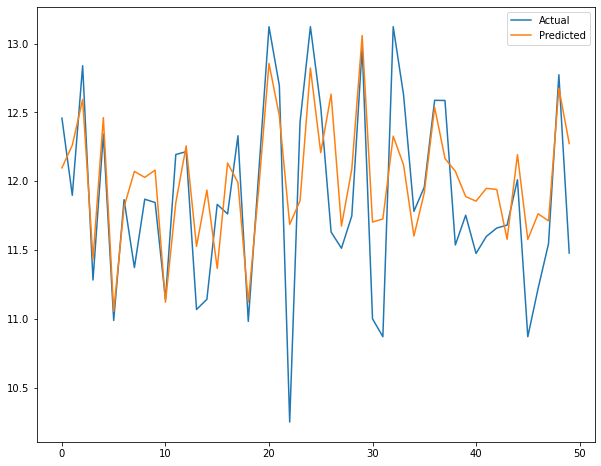

In [39]:
plt.figure(figsize=(10,8))
plt.plot(df3[:50])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
r2 = r2_score(y_test, y_pred3)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.38195727905282767
R-square: 0.556337800557697


## Random Forest

In [41]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
rf.score(X_test , y_test)

0.7386422323975799

In [43]:
y_pred4 =rid.predict(X_test)
df4 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred4})
df4.reset_index(inplace= True)
df4 = df4.drop('index', axis=1)
df4

,Y_test,Y_pred2
0,12.457998,12.096712
1,11.897507,12.261705
2,12.838939,12.593524
3,11.282254,11.435090
4,12.341914,12.461645
...,...,...
6123,12.123234,11.978529
6124,11.766016,12.304527
6125,11.525842,11.565481
6126,11.470018,12.139105


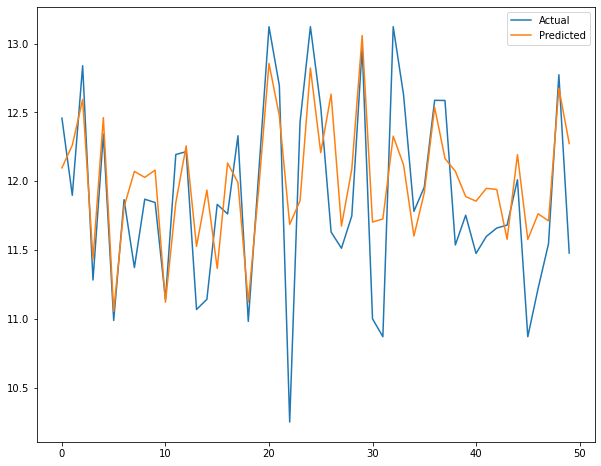

In [44]:
plt.figure(figsize=(10,8))
plt.plot(df4[:50])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
r2 = r2_score(y_test, y_pred4)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.38195727905282767
R-square: 0.556337800557697


# XGB Regression

In [46]:
import sys
!{sys.executable} -m pip install xgboost

In [47]:
from xgboost import XGBRegressor

In [48]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [49]:
xgboost.score(X_test , y_test)

0.7302892324491502

In [50]:
y_pred5 = xgboost.predict(X_test)
df5 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred5})
df5.reset_index(inplace= True)
df5 = df5.drop('index', axis=1)
df5

,Y_test,Y_pred2
0,12.457998,12.299930
1,11.897507,11.907424
2,12.838939,12.504189
3,11.282254,11.071383
4,12.341914,12.499709
...,...,...
6123,12.123234,12.121544
6124,11.766016,12.037086
6125,11.525842,11.625696
6126,11.470018,11.864741


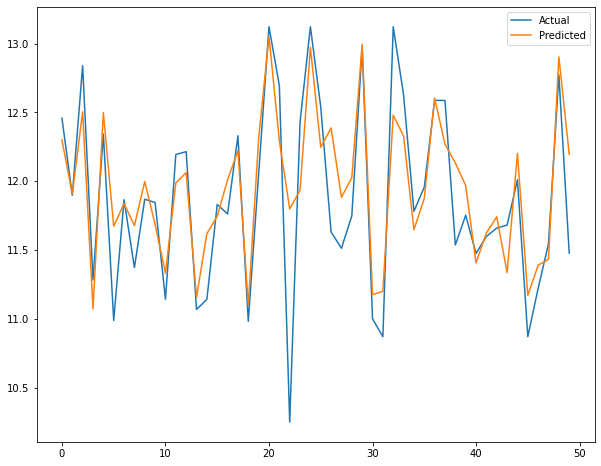

In [51]:
plt.figure(figsize=(10,8))
plt.plot(df5[:50])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred5))
r2 = r2_score(y_test, y_pred5)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.29780893220581733
R-square: 0.7302892324491502


In [53]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 16.9min finished


RandomForestRegressor(max_depth=110, max_features=2, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=1000)

In [58]:
import pickle

In [60]:
pickle.dump(best_grid, open('model.pkl','wb'))
best_grid.score(X_test, y_test)

0.7518601099273949